### Imports

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

### Load the data

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Fetch_apprenticeship/data_daily.csv')
df.head()

,# Date,Receipt_Count
0,2021-01-01,7564766
1,2021-01-02,7455524
2,2021-01-03,7095414
3,2021-01-04,7666163
4,2021-01-05,7771289


In [ ]:
df.tail()

,# Date,Receipt_Count
360,2021-12-27,10350408
361,2021-12-28,10219445
362,2021-12-29,10313337
363,2021-12-30,10310644
364,2021-12-31,10211187


In [ ]:
df.shape

(365, 2)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   # Date         365 non-null    object
 1   Receipt_Count  365 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 5.8+ KB


In [ ]:
df.describe()

,Receipt_Count
count,3.650000e+02
mean,8.826566e+06
std,7.820089e+05
min,7.095414e+06
25%,8.142874e+06
50%,8.799249e+06
75%,9.476970e+06
max,1.073886e+07


In [ ]:
df['# Date'] = pd.to_datetime(df['# Date'])

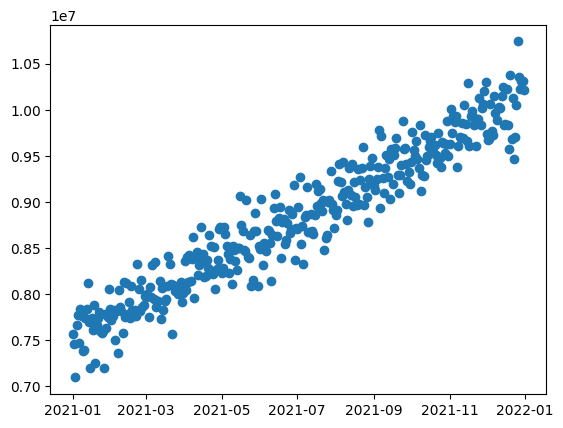

In [ ]:
plt.scatter(df['# Date'],df['Receipt_Count']);

### Linear Regression Model

In [ ]:
X = np.arange(1, 366)

In [ ]:
Y = df['Receipt_Count'].to_numpy()

We fit a line y = mx + b to our data. We choose parameters m, b so as to minimize the sum of squared errors. Our loss function in this case is
$L = \sum_{i=1}^{365}(Y_i -(m X_i + b))^2$. To compute parameters m, b that minimize L, we compute the partial derivatives $dL/dm$ and $dL/db$ and set them equal to zero. After some math we get

$m = \frac{\bar{XY} - \bar{X}\bar{Y}}{\bar{X^2} - \bar{X}^2}$ and
$b = \frac{\bar{Y}\bar{X^2} - \bar{X}\bar{XY}}{\bar{X^2} - \bar{X}^2}$,

where $\bar{\cdot}$ stands for the mean of that quantity.

In [ ]:
# apply the equations to calculate m, b
denominator = X.dot(X) - X.mean() * X.sum()
m = (X.dot(Y) - Y.mean()* X.sum()) / denominator
b = (Y.mean() * X.dot(X) - X.mean() * X.dot(Y)) / denominator

In [ ]:
print(m, b)

7120.068013414836 7523593.605599879


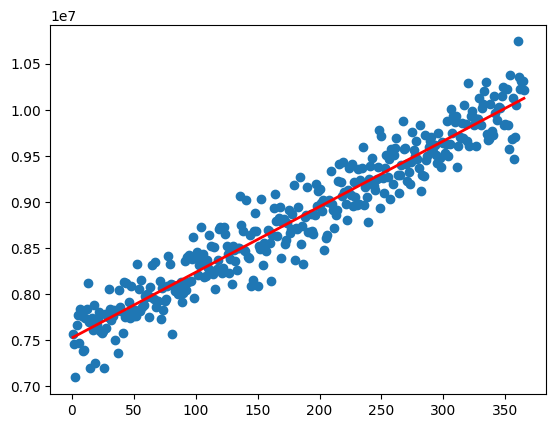

In [ ]:
# calculate predicted Y
Yhat = m * X + b

# plot the data and prediction
plt.scatter(X,Y)
plt.plot(X,Yhat, color='red', linewidth = 2);

#### Verify the conditions for application of linear regression


In [ ]:
# the mean of the residual shoul be close to 0
residual = Y - Yhat
residual.mean()

2.2198647668916884e-10

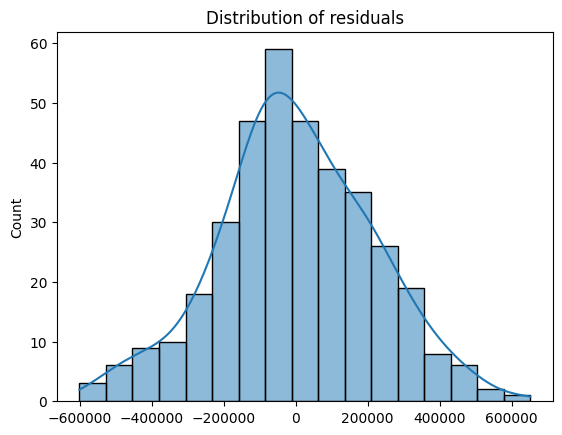

In [ ]:
# residuals should be normaly distributed
sns.histplot(residual, kde=True)
plt.title('Distribution of residuals');

### Prediction of monthly average of number of receipts for 2022
 Since our predictor function is linear, the predicted average number of receipts per month is equal to the predicted number of receipts on the 16th of the month for a month with 31 day, the average of the number of receipts on the 15th and 16th for a month with 30 days and the average of number of receipts on 14th and 15th in February of 2022.

 We will approximate the predicted monthly average by the number of receipts on the 15th of the month.